In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/surya/DL_Ops/Assignment_0/')
#os.chdir('/content/drive/MyDrive/surya/AML_Assignment/Major_Project/MetaOptNet')

Mounted at /content/drive


#Q.1 Build and install OpenCV on Google Colab:

In [2]:
!pip install opencv-python


#Q.2 Load and view a JPG image from your system:

Saving images.jpeg to images.jpeg


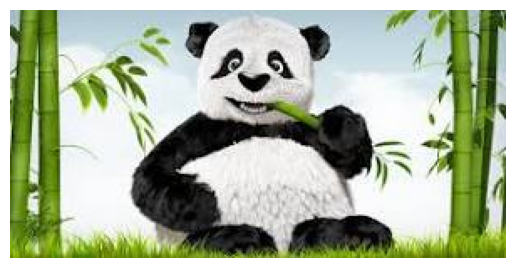

In [3]:
import cv2
from google.colab import files
import matplotlib.pyplot as plt

# Upload the image file using the files.upload() method
uploaded = files.upload()

# Read the uploaded image
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


#Q.3 Perform the following operations on the loaded image, visualize and save each output generated:
	a. Visualize each channel as a grayscale
	b. Crop a desired region of interest from the image
	c. Resize the image to a smaller and larger size, observe the effect of various interpolation techniques
	d. Rotate the image by the following degrees in the anti-clockwise direction 30, 90, 180

	e. Translate the image by 2 pixels in any direction.
	f. Normalize the image to the [0,1] range, observe the effect of various normalization techniques
	g. Calculate the intensity histogram and visualize it using Matplotlib.

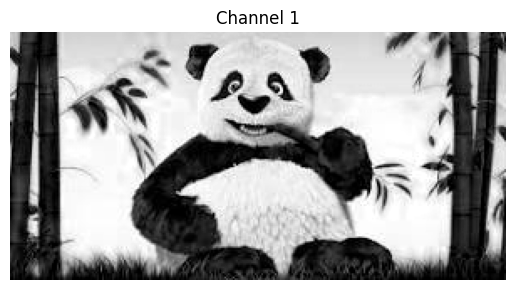

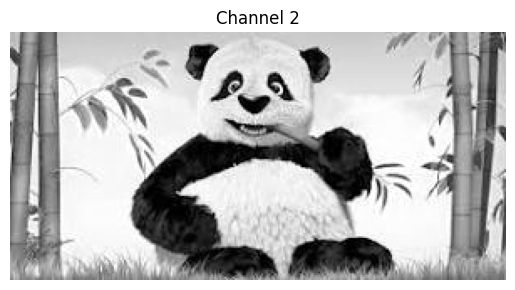

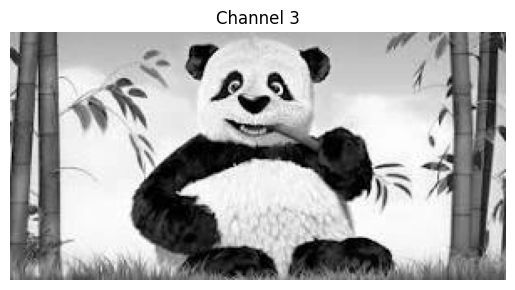

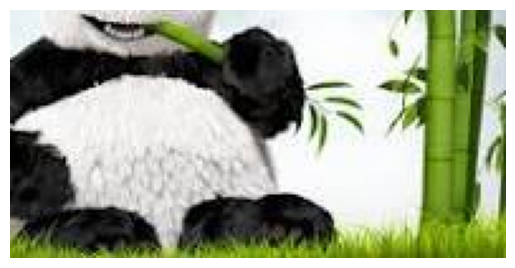

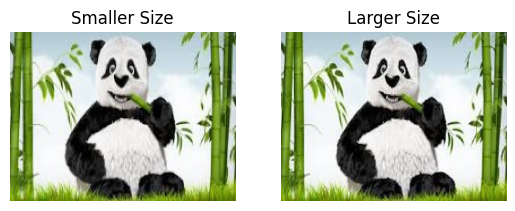

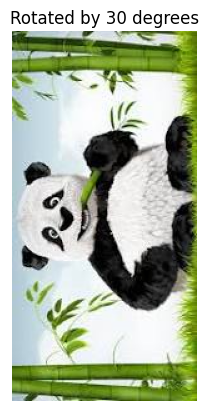

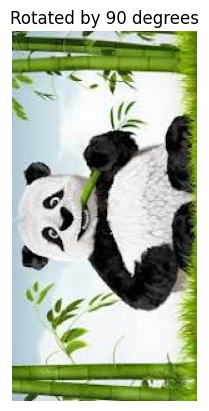

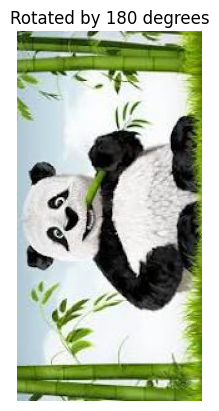

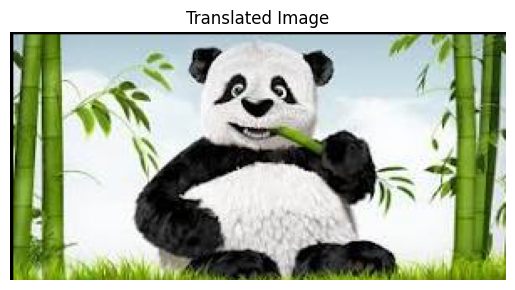

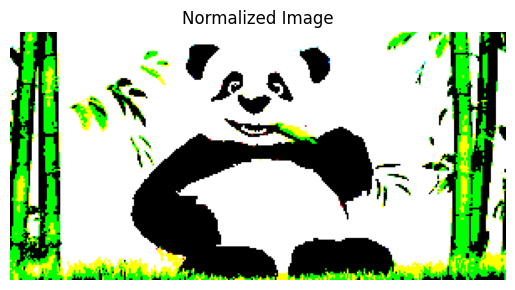

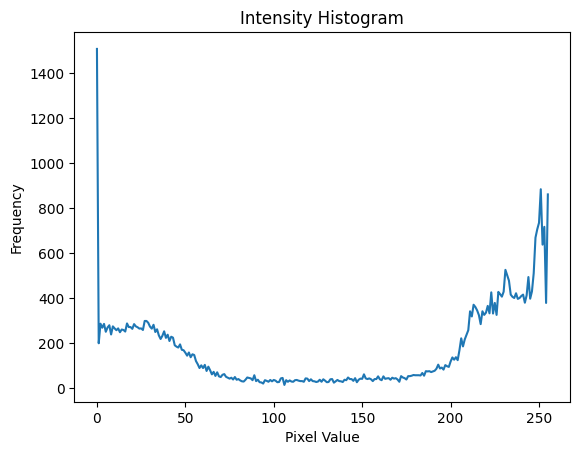

In [4]:
# a. Visualize each channel as grayscale
import numpy as np
for i in range(3):
    channel = img[:, :, i]
    plt.imshow(channel, cmap='gray')
    plt.title(f'Channel {i + 1}')
    plt.axis('off')
    plt.show()

# b. Crop a desired region of interest (ROI) from the image
x, y, w, h = 100, 50, 200, 150
roi = img[y:y+h, x:x+w]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# c. Resize the image to a smaller and larger size
small_img = cv2.resize(img, (200, 150), interpolation=cv2.INTER_LINEAR)
large_img = cv2.resize(img, (800, 600), interpolation=cv2.INTER_NEAREST)

# Display the resized images
plt.subplot(121), plt.imshow(cv2.cvtColor(small_img, cv2.COLOR_BGR2RGB)), plt.title('Smaller Size')
plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(large_img, cv2.COLOR_BGR2RGB)), plt.title('Larger Size')
plt.axis('off')
plt.show()

# d. Rotate the image by different degrees
degrees = [30, 90, 180]
for angle in degrees:
    rotated_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Rotated by {angle} degrees')
    plt.axis('off')
    plt.show()

# e. Translate the image by 2 pixels in any direction
rows, cols, _ = img.shape
M = np.float32([[1, 0, 2], [0, 1, 2]])
translated_img = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(cv2.cvtColor(translated_img, cv2.COLOR_BGR2RGB))
plt.title('Translated Image')
plt.axis('off')
plt.show()

# f. Normalize the image to the [0,1] range
normalized_img = cv2.normalize(img, None, 0, 1, cv2.NORM_MINMAX)
plt.imshow(cv2.cvtColor((normalized_img * 255).astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Normalized Image')
plt.axis('off')
plt.show()

# g. Calculate the intensity histogram and visualize it using Matplotlib
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title('Intensity Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()
